<h1 align='center' style='color:black'><b>Insurance premium Prediction</b></h1>
<h2 align='center' style='color:black'><b>by predicting Medical Expenses</b></h2>

## General Description: -
The dataset is retrieved from Machine Learning Website by Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6. 
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Aim: -
The purposes of this exercise to look into different features to observe their relationship, and plot a regression model based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that will help medical insurance company to make decision on charging the premium

## Outline: -
1. Import Dataset
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis
5. Train Test Split
6. Model Building
7. Model Evaluation

In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data Cleaning and Preparation

In [3]:
# Checking the info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns in the data set provided

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
# creating a copy of the dataset
df_cpy = df.copy()

In [6]:
# checking columns names
df_cpy.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

All the columns names are in lowercase letters, and there are no extra spaces in column names

In [7]:
# checking null values
df_cpy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There are no null values in our dataset

The last thing left in Data Preparation is Outlier Treatment. So lets create Box plot for Expenses and check for Outliers

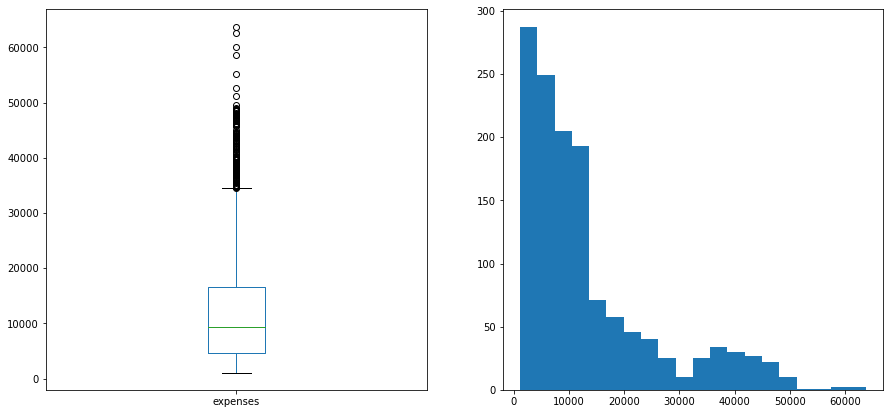

In [8]:
plt.subplots(figsize=(15,7))  

plt.subplot(1,2,1)         
df_cpy['expenses'].plot.box()

plt.subplot(1,2,2)      
plt.hist(df_cpy['expenses'], bins=20)

plt.show()

There are few entries in which expenses are way far from other expenses. They might effect the prediction, so we have to eliminate them.

In [9]:
df_cpy.expenses.describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

As can be seen the max value is way more than mean , median . Therefore according to the box plot, let's delete the rows that has expenses > 50000

In [10]:
df_cpy = df_cpy[df_cpy['expenses']< 50000]   
df_cpy.shape

(1331, 7)

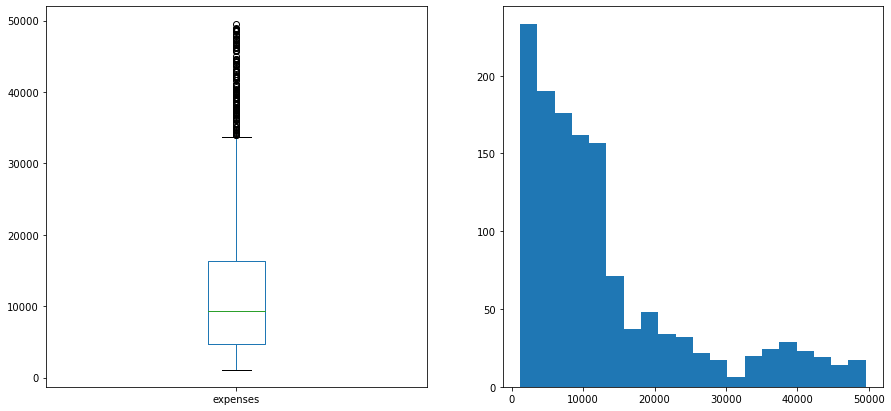

In [11]:
# checking the box plot again
plt.subplots(figsize=(15,7))  

plt.subplot(1,2,1)         
df_cpy['expenses'].plot.box()

plt.subplot(1,2,2)      
plt.hist(df_cpy['expenses'], bins=20)

plt.show()

All the data points above the 75% line are very close to each other so leaving it as is.

### Treating Categorical data

Here we have 3 columns having categorical values and 4 columns have numerical values, Before proceeding further, we have to convert categorical values into numerical values.

In [14]:
# applying one-hot encoding on the categorical features 
df_dummy= pd.get_dummies(df_cpy)

In [15]:
df_dummy

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


##  Exploratory Data Analysis

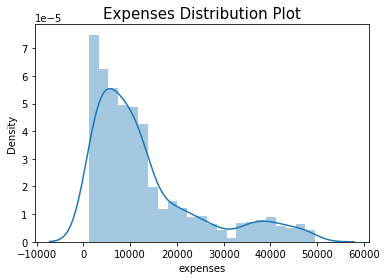

In [16]:
# We will first check the distribution of expenses by creating a distplot

sns.distplot(df_dummy.expenses)
plt.title("Expenses Distribution Plot",fontsize=15)
plt.show()

Data is randomly distributed, mostly people have their medical expenses below 30000, Small number of people have their medical expenses between 30000 to 50000

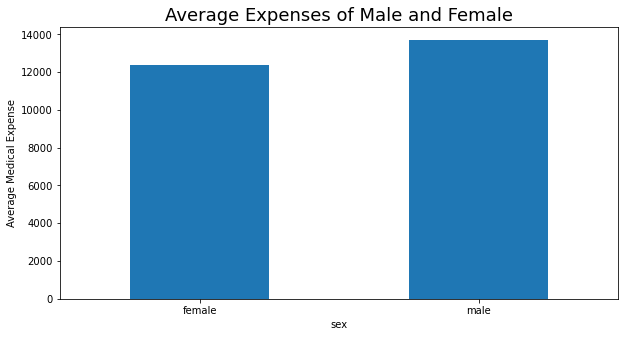

In [17]:
# Medical Expenses of male and female
plt.figure(figsize=(10,5))
df_cpy.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of Male and Female",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

Average medical expense of male is greater than females

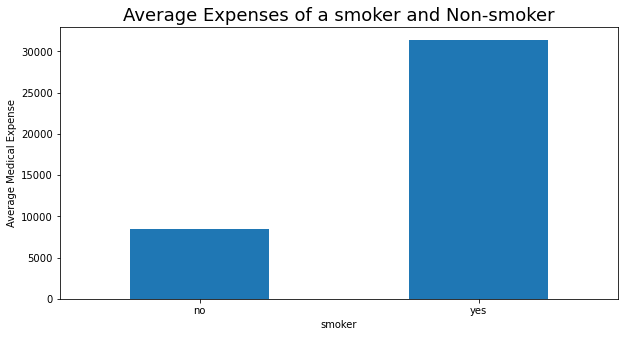

In [18]:
# Medical Expenses of male and female
plt.figure(figsize=(10,5))
df_cpy.groupby(['smoker'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of a smoker and Non-smoker",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

Medical Expense of an smoker is much more than a person who doesn't smoke

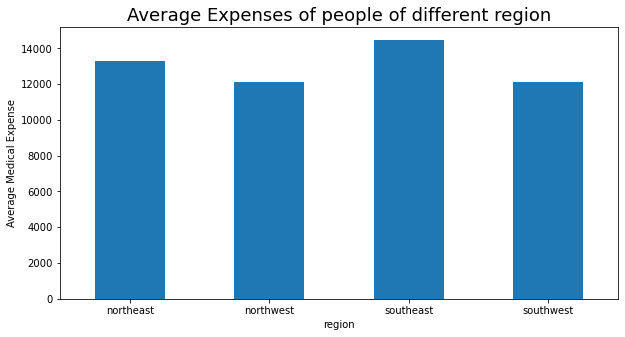

In [19]:
# Medical Expenses of male and female
plt.figure(figsize=(10,5))
df_cpy.groupby(['region'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of people of different region",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

### Checking the relationship between different features

<Figure size 720x1080 with 0 Axes>

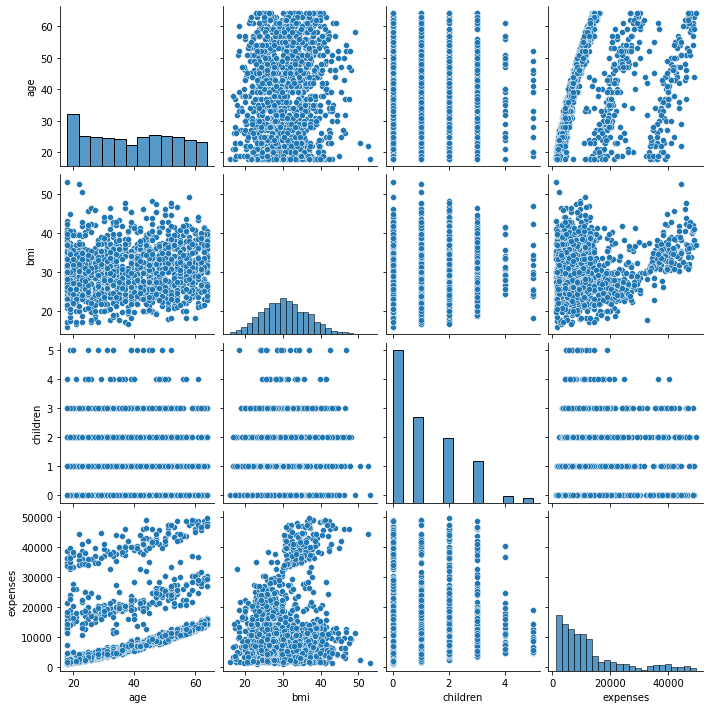

In [20]:
# Plot a pair plot
plt.figure(figsize=(10,15))
sns.pairplot(df_cpy)
plt.show()

Lets visualize correlation coefficients using heatmap

<AxesSubplot:>

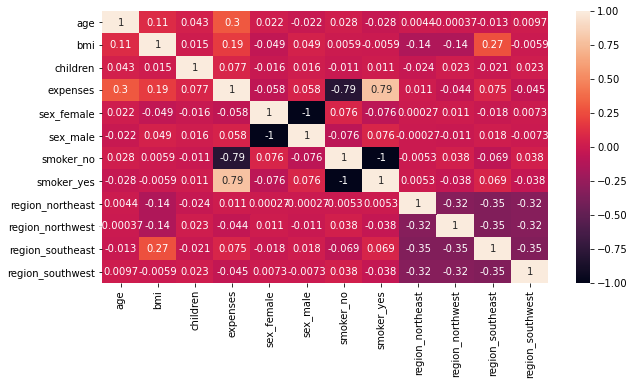

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df_dummy.corr(),annot=True) 

There are no probable correlation between the various feature of our data.
Only 'Smoker' feature has maximum correlation to the target

## Train Test Split

Splitting the dataset into the Training set and Test set using train_test_split

In [22]:
# at first let's create a copy of our data to use in model building
df_2 = df_dummy.copy()
df_2.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [23]:
# Seperating Dependent and Independent Variables

y = df_2.pop('expenses')
X = df_2

In [24]:
print(X.shape)
print(y.shape)

(1331, 11)
(1331,)


In [25]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Checking sizes of data to know whether they are split correctly 

In [26]:
# Shape of train set
print(X_train.shape)

# Shape of test set
print(X_test.shape)

(931, 11)
(400, 11)


In [27]:
print(y_train.shape)
print(y_test.shape)

(931,)
(400,)


In [28]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
293,22,28.8,0,1,0,1,0,0,0,1,0
1088,52,47.7,1,0,1,1,0,0,0,1,0
685,53,26.4,2,0,1,1,0,1,0,0,0
142,34,25.3,2,0,1,0,1,0,0,1,0
675,45,21.4,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1099,25,34.0,1,1,0,1,0,0,0,1,0
1134,28,33.8,0,0,1,1,0,0,1,0,0
1301,62,30.9,3,0,1,0,1,0,1,0,0
864,51,25.4,0,0,1,1,0,0,0,0,1


In [29]:
y_train

293      2156.75
1088     9748.91
685     11244.38
142     18972.50
675      7222.79
          ...   
1099     3227.12
1134    19673.34
1301    46718.16
864      8782.47
1130     8582.30
Name: expenses, Length: 931, dtype: float64

In [30]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
950,57,18.3,0,0,1,1,0,1,0,0,0
1131,27,45.9,2,0,1,1,0,0,0,0,1
1239,25,42.1,1,1,0,1,0,0,0,1,0
298,31,34.4,3,0,1,0,1,0,1,0,0
657,27,33.2,2,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
710,18,35.2,1,0,1,1,0,0,0,1,0
333,56,28.8,0,1,0,1,0,1,0,0,0
356,46,43.9,3,0,1,1,0,0,0,1,0
139,22,36.0,0,1,0,1,0,0,0,0,1


In [31]:
y_test

950     11534.87
1131     3693.43
1239     3238.44
298     38746.36
657      4058.71
          ...   
710      1727.54
333     11658.38
356      8944.12
139      2166.73
382     20781.49
Name: expenses, Length: 400, dtype: float64

## Model Building

In [32]:
# using multiple linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Visualising the model
Let's Plot a scatter plot to show the real values and the predicted values of Expenses using our Model
Since we have two numerical values in our initial data, i.e BMI and Age, we will use that in visualising the predicted results

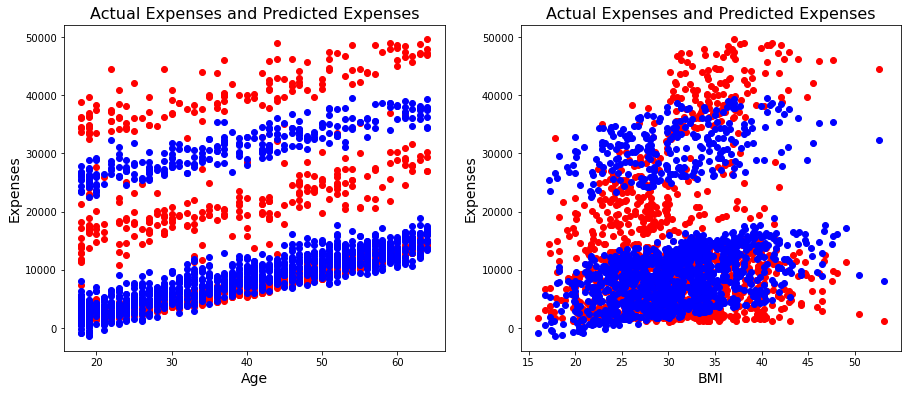

In [33]:
# Age vs Expenses
plt.subplots(figsize=(15,6))  

plt.subplot(1,2,1)
plt.scatter(df_cpy['age'], y, color = 'red')
plt.scatter(df_cpy['age'], reg.predict(X), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Expenses',fontsize = 14)

# BMI vs Expenses
plt.subplot(1,2,2)
plt.scatter(df_cpy['bmi'], y, color = 'red')
plt.scatter(df_cpy['bmi'], reg.predict(X), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Expenses',fontsize = 14)
plt.show()

Here the red points indicates actual expenses and the blue points indicate predicted Expenses.

As we can see **many predicted values are very different from the actual values**, therefore let's check it's accuracy.

In [34]:
# checking the model
reg.score(X_test,y_test)

0.7653301575491325

Therefore the multiple linear regression model we created is able to predict the results with an **accuracy of 76%**

**Let's make another model for the given data using Polynomial Regression with better acccuracy**

### Polynomial Regression model

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
reg_2 = LinearRegression()
reg_2.fit(X_poly, y_train)
print(X_poly)

[[ 1.  22.  28.8 ...  0.   0.   0. ]
 [ 1.  52.  47.7 ...  0.   0.   0. ]
 [ 1.  53.  26.4 ...  0.   0.   0. ]
 ...
 [ 1.  62.  30.9 ...  0.   0.   0. ]
 [ 1.  51.  25.4 ...  0.   0.   1. ]
 [ 1.  39.  23.9 ...  0.   0.   0. ]]


### Visualising the Model

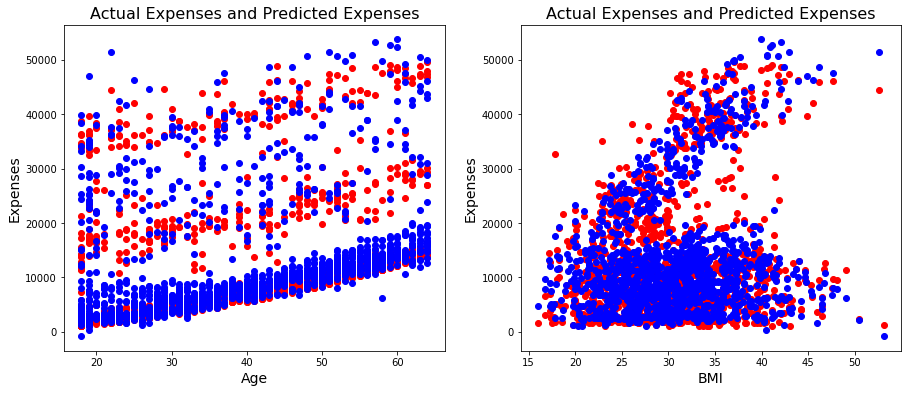

In [36]:
# Plotting a scatter plot to show the real values and the predicted values of Expenses using our Model
plt.subplots(figsize=(15,6))  

# Age vs Expenses
plt.subplot(1,2,1)
plt.scatter(df_cpy['age'], y, color = 'red')
plt.scatter(df_cpy['age'], reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Expenses', fontsize = 14)

# BMI vs Expenses
plt.subplot(1,2,2)
plt.scatter(df_cpy['bmi'], y, color = 'red')
plt.scatter(df_cpy['bmi'], reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Expenses', fontsize = 14)
plt.show()

As we can see **most of the predicted values are very near to the actual value of Expenses**, and **It is predicting values better than the previos model** which shows that **it is better than the previous model**, Let's check it's accuracy too.

## Model Evaluation

In [37]:
reg_2.score(poly_reg.fit_transform(X_test), y_test)

0.8551581077919526

Since **the polynomial regression model is predicting result with accuracy 85%, it is better than the previous model**

**The model generated can be used for predicting medical expenses, using which we can predict our Insurance Premium amount.**

#### Using
#### y_pred = reg_2.predict(poly_reg.fit_transform(X_sample))
#### we can predict the medical expenses of a person and hence can predict the Insurance Premium amount according to the predicted medical expenses.